## Import packages 

In [1]:
#Install tensorflow
!pip install tensorflow

In [2]:
#Install kerasb
!pip install keras

In [3]:
#Install sklearn
!pip install sklearn

In [4]:
#Install seaborn
!pip install seaborn

In [18]:
'''Incase of a module error, please connect to the internet and run this cell again'''

try:
    import pandas as pd
except:
    !pip install pandas

    
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib

    
    
try:
    import seaborn as sns
except:
    !pip install seaborn

try:
    import sklearn
except:
    !pip install sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

try:
    import warnings
except:
    !pip install warnings

warnings.filterwarnings('ignore')
import random
#systems
import os

try:
    import numpy as np
except:
    !pip install numpy

try:
    import seaborn as sns
except:
    !pip install seaborn

try:
    from time import time
except:
    !pip install time


    

try:
    import errno
except:
    !pip install errno

try:
    import shutil
except:
    !pip install shutil

try:
    from keras.models import Sequential
except:
    !pip install keras

from keras.models import Sequential

try:
    import tensorflow as tf
except:
    !pip install tensorflow

import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

### Create data directory

In [2]:
def copy(src, dest):
    try:
        shutil.copytree(src, dest)
    except OSError as e:
        # If the error was caused because the source wasn't a directory
        if e.errno == errno.ENOTDIR:
            shutil.copy(src, dest)
        else:
            print('Directory not copied. Error: %s' % e)

### Import the analysis data

In [4]:
# Load data
lfw_dataset = sklearn.datasets.fetch_lfw_people(data_home = 'data', min_faces_per_person=100,  download_if_missing = False)

#### Data Overview

In [5]:
n_samples, h, w = lfw_dataset.images.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_dataset.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_dataset.target
target_names = lfw_dataset.target_names
n_classes = target_names.shape[0]

In [6]:
print("Size of dataset (General information):\n")
print("Number of samples: %d" % n_samples)
print("Number of features: %d" % n_features)
print("Number of classes: %d" % n_classes)

Size of dataset (General information):

Number of samples: 1140
Number of features: 2914
Number of classes: 5


### Data Handling

In [7]:
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

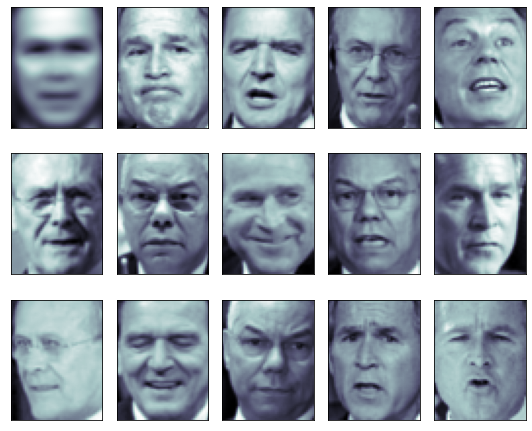

In [8]:
def plot_faces(images, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
    plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.bone)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()
    

Xmean = np.mean(X,axis=0).reshape(1,n_features) # average face
#plot the average face and some samples from the dataset
plot_faces(np.concatenate((Xmean,X[:15]),axis=0))

In [9]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

### Support Vector Machine

In [10]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 855 faces
done in 0.582s


In [11]:
eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Projecting the input data on the eigenfaces orthonormal basis
done in 0.041s


In [12]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 18.682s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [13]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print('\n\n',classification_report(y_test, y_pred, target_names=target_names),'\n\n')
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.064s


                    precision    recall  f1-score   support

     Colin Powell       0.94      0.94      0.94        64
  Donald Rumsfeld       0.96      0.84      0.90        32
    George W Bush       0.90      0.98      0.94       127
Gerhard Schroeder       0.92      0.83      0.87        29
       Tony Blair       0.93      0.82      0.87        33

         accuracy                           0.92       285
        macro avg       0.93      0.88      0.90       285
     weighted avg       0.92      0.92      0.92       285
 


[[ 60   0   4   0   0]
 [  0  27   3   1   1]
 [  3   0 124   0   0]
 [  1   0   3  24   1]
 [  0   1   4   1  27]]


In [14]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)),  cmap=plt.cm.bone)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

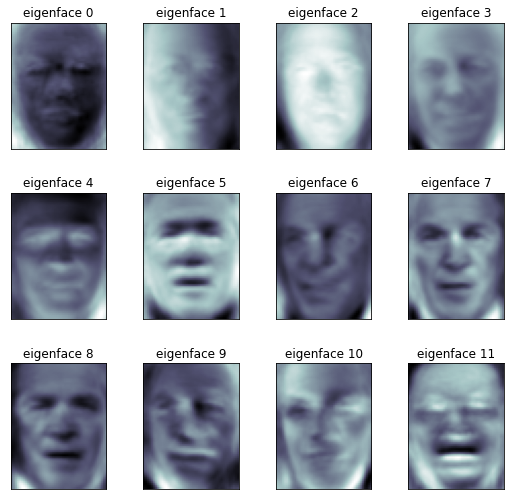

In [15]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

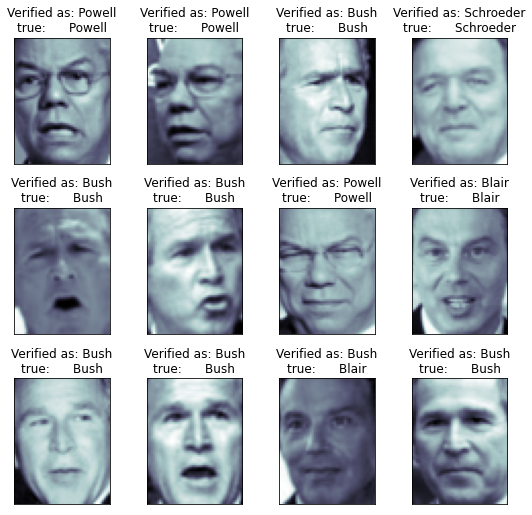

In [16]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'Verified as: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

### Convolutional Neural Network (CNN)

In [19]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(128, input_shape=(2914,), activation='relu'))
# output layer
model.add(Dense(5, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               373120    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 373,765
Trainable params: 373,765
Non-trainable params: 0
_________________________________________________________________


In [20]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 5
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
np.random.seed(10)
# training the model for 200 epochs
history = model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (855,)
Shape after one-hot encoding:  (855, 5)
Epoch 1/100
7/7 [==============================] - 2s 97ms/step - loss: 747.3925 - accuracy: 0.3053 - val_loss: 542.7224 - val_accuracy: 0.1123
Epoch 2/100
7/7 [==============================] - 0s 39ms/step - loss: 482.6342 - accuracy: 0.2393 - val_loss: 244.6209 - val_accuracy: 0.2421
Epoch 3/100
7/7 [==============================] - 0s 47ms/step - loss: 191.1578 - accuracy: 0.3783 - val_loss: 127.7168 - val_accuracy: 0.2211
Epoch 4/100
7/7 [==============================] - 0s 51ms/step - loss: 113.4114 - accuracy: 0.2093 - val_loss: 77.8721 - val_accuracy: 0.4386
Epoch 5/100
7/7 [==============================] - 0s 46ms/step - loss: 66.2564 - accuracy: 0.3340 - val_loss: 44.3532 - val_accuracy: 0.4456
Epoch 6/100
7/7 [==============================] - 0s 36ms/step - loss: 31.2633 - accuracy: 0.4012 - val_loss: 21.8675 - val_accuracy: 0.4561
Epoch 7/100
7/7 [==============================] - 0s 55ms/ste

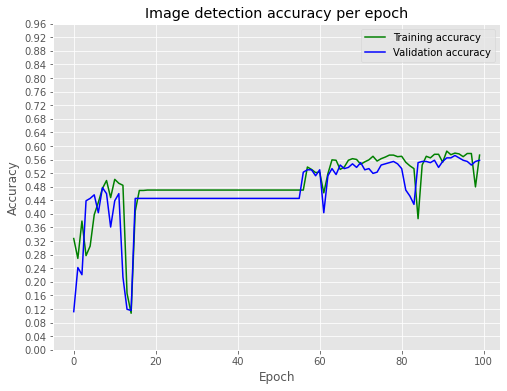

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'],label='Training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='Validation accuracy',color='blue')
plt.title('Image detection accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1, step=0.04))
plt.legend()
plt.show()

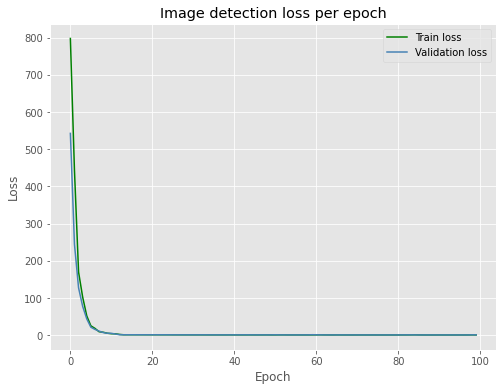

In [22]:
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],label='Train loss',color='green')
plt.plot(history.history['val_loss'],label='Validation loss',color='steelblue')
plt.xlabel('Epoch')
plt.title('Image detection loss per epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

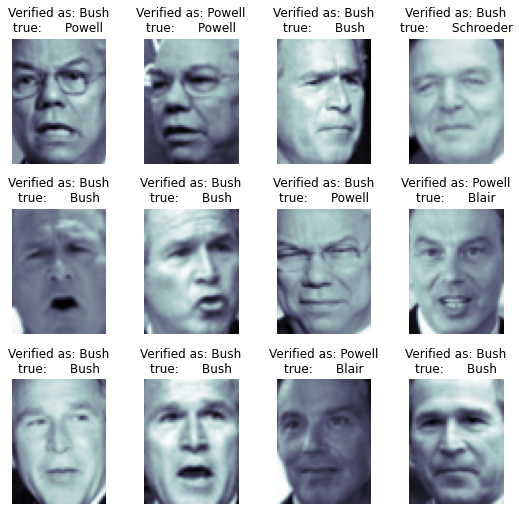

In [24]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'Verified as: %s\ntrue:      %s' % (pred_name, true_name)


prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

In [25]:
print('\n\n',classification_report(y_test, y_pred, target_names=target_names,zero_division=1),'\n\n')



                    precision    recall  f1-score   support

     Colin Powell       0.37      0.62      0.47        64
  Donald Rumsfeld       1.00      0.00      0.00        32
    George W Bush       0.67      0.94      0.78       127
Gerhard Schroeder       1.00      0.00      0.00        29
       Tony Blair       1.00      0.00      0.00        33

         accuracy                           0.56       285
        macro avg       0.81      0.31      0.25       285
     weighted avg       0.71      0.56      0.45       285
 




### CNN 2

In [26]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(64, input_shape=(2914,), activation='relu'))
model.add(Dense(128, input_shape=(2914,), activation='relu'))
model.add(Dense(256, input_shape=(2914,), activation='relu'))
# output layer
model.add(Dense(5, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                186560    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 1285      
Total params: 229,189
Trainable params: 229,189
Non-trainable params: 0
_________________________________________________________________


In [27]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 5
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
np.random.seed(10)
# training the model for 200 epochs
history = model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (855,)
Shape after one-hot encoding:  (855, 5)
Epoch 1/100
7/7 [==============================] - 1s 44ms/step - loss: 125.9306 - accuracy: 0.2518 - val_loss: 234.6996 - val_accuracy: 0.1158
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 128.2158 - accuracy: 0.2088 - val_loss: 79.3998 - val_accuracy: 0.1123
Epoch 3/100
7/7 [==============================] - 0s 16ms/step - loss: 56.9843 - accuracy: 0.2418 - val_loss: 42.5944 - val_accuracy: 0.4456
Epoch 4/100
7/7 [==============================] - 0s 19ms/step - loss: 32.6683 - accuracy: 0.3488 - val_loss: 35.9706 - val_accuracy: 0.4491
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 36.4035 - accuracy: 0.3778 - val_loss: 12.2656 - val_accuracy: 0.4807
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 19.1502 - accuracy: 0.3478 - val_loss: 14.0012 - val_accuracy: 0.4526
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - 

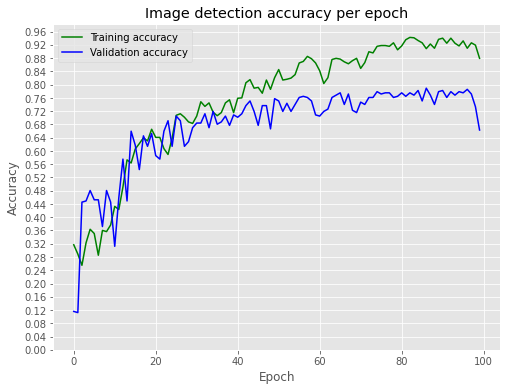

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'],label='Training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='Validation accuracy',color='blue')
plt.title('Image detection accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1, step=0.04))
plt.legend()
plt.show()

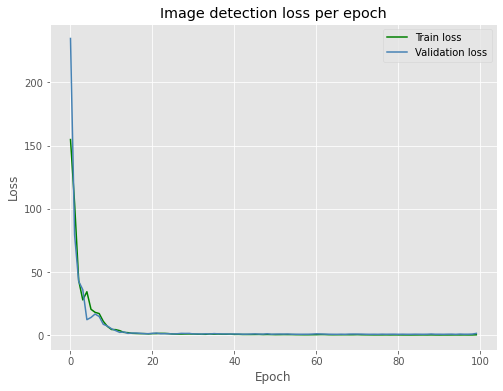

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],label='Train loss',color='green')
plt.plot(history.history['val_loss'],label='Validation loss',color='steelblue')
plt.xlabel('Epoch')
plt.title('Image detection loss per epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

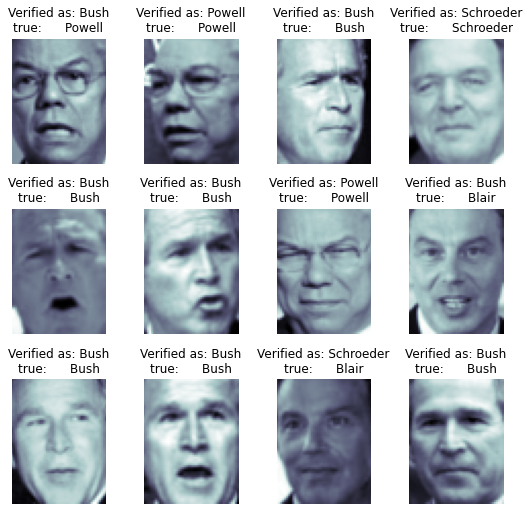

In [31]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'Verified as: %s\ntrue:      %s' % (pred_name, true_name)


prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

In [32]:
print('\n\n',classification_report(y_test, y_pred, target_names=target_names,zero_division=1),'\n\n')



                    precision    recall  f1-score   support

     Colin Powell       0.90      0.41      0.56        64
  Donald Rumsfeld       0.83      0.16      0.26        32
    George W Bush       0.63      0.97      0.76       127
Gerhard Schroeder       0.62      0.69      0.66        29
       Tony Blair       0.68      0.45      0.55        33

         accuracy                           0.66       285
        macro avg       0.73      0.54      0.56       285
     weighted avg       0.72      0.66      0.62       285
 




### K-NN Classifier

In [34]:
import numpy as np

#Eucledean distance
def calculateDistance(i1, i2):
    return np.sum((i1-i2)**2)

class NearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y


    def predict(self, X):
        """ X is N x D where each row is an example we wish to predict label for """
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        # loop over all test rows
        for i in range(num_test):
          # find the nearest training image to the i'th test image
          # using the eucledean distance
            distances =  calculateDistance(self.Xtr , X[i,:])
            min_index = np.argmin(distances) # get the index with smallest distance
            Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

        return Ypred

In [35]:
nn = NearestNeighbor() # create a Nearest Neighbor classifier class
nn.train(X_train, y_train.reshape(-1,1)) # train the classifier on the training images and labels
y_pred = nn.predict(y_test.reshape(-1,1)) # predict labels on the test images

In [36]:
print('\n\n',classification_report(y_test, y_pred, target_names=target_names,zero_division=1),'\n\n')



                    precision    recall  f1-score   support

     Colin Powell       1.00      0.00      0.00        64
  Donald Rumsfeld       1.00      0.00      0.00        32
    George W Bush       0.45      1.00      0.62       127
Gerhard Schroeder       1.00      0.00      0.00        29
       Tony Blair       1.00      0.00      0.00        33

         accuracy                           0.45       285
        macro avg       0.89      0.20      0.12       285
     weighted avg       0.75      0.45      0.27       285
 




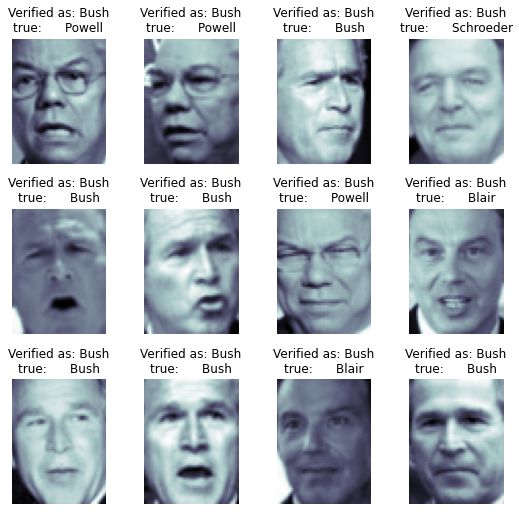

In [37]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)